In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("drive/MyDrive/UniCredit онлайн-стажировка/data/Заявки.xlsx")
df.head()

,Идентификатор заявления,Программа кредитования,Тип клиента,Дата заявки,Флаг одобрения
0,X-6BX3JFA,Standard,Существующий клиент,201901.0,0.0
1,X-6BJQ0PR,Standard,Существующий клиент,201901.0,0.0
2,X-6C63S2W,Standard,Существующий клиент,201901.0,0.0
3,X-6C6LLYC,Standard,Существующий клиент,201901.0,0.0
4,X-6CDURAK,Standard,Существующий клиент,201901.0,0.0


In [4]:
df.describe()

,Дата заявки,Флаг одобрения
count,166183.000000,166183.000000
mean,201906.700932,0.371422
std,3.361164,0.483186
min,201901.000000,0.000000
25%,201904.000000,0.000000
50%,201907.000000,0.000000
75%,201910.000000,1.000000
max,201912.000000,1.000000


In [5]:
df.nunique()

Идентификатор заявления    166183
Программа кредитования          2
Тип клиента                     4
Дата заявки                    12
Флаг одобрения                  2
dtype: int64

In [6]:
df.isnull().sum()

Идентификатор заявления    0
Программа кредитования     0
Тип клиента                0
Дата заявки                0
Флаг одобрения             0
dtype: int64

In [7]:
df['Дата заявки'].unique()

array([201901., 201902., 201903., 201904., 201910., 201905., 201906.,
       201907., 201908., 201909., 201911., 201912.])

In [8]:
df[['Дата заявки']] = df[['Дата заявки']].astype(str)

In [9]:
time_series = df[['Идентификатор заявления', 'Дата заявки']].groupby('Дата заявки').count()
time_series.reset_index(inplace=True)

In [10]:
df.sort_values(by='Дата заявки', inplace=True)

In [11]:
def process_date(date):
    month = str(date)[4:6]
    return datetime.datetime.strptime(month, '%m').strftime('%b')

In [12]:
df['Дата заявки'] = df['Дата заявки'].apply(process_date)

In [13]:
df.rename(columns={'Дата заявки' : 'Месяц'}, inplace=True)

Рассмотрим такой показатель, как количество заявок

In [14]:
df['Идентификатор заявления'].count()

166183

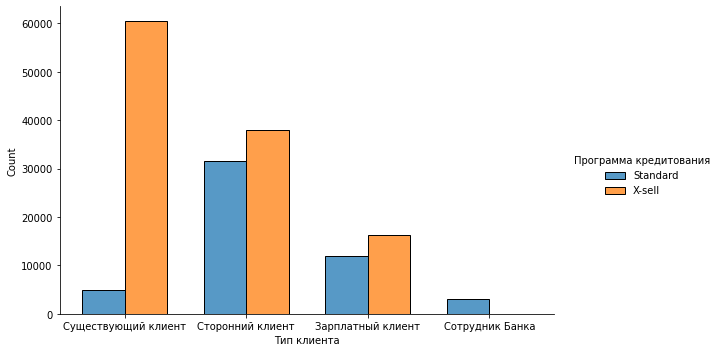

In [15]:
sns.displot(data=df, x='Тип клиента', hue='Программа кредитования', multiple='dodge', aspect=1.6, shrink=0.7)
pass

Количество заявок по месяцам

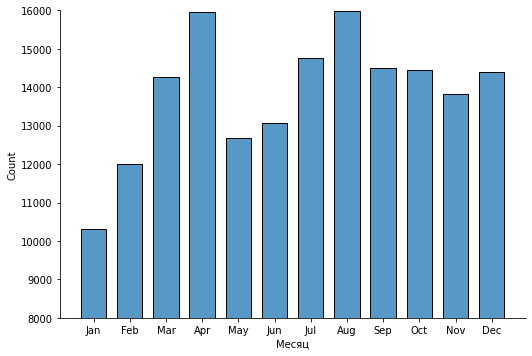

In [16]:
a = sns.displot(data=df, x='Месяц', shrink=.7, aspect=1.5)
a.set(ylim=(8000,16000))
pass

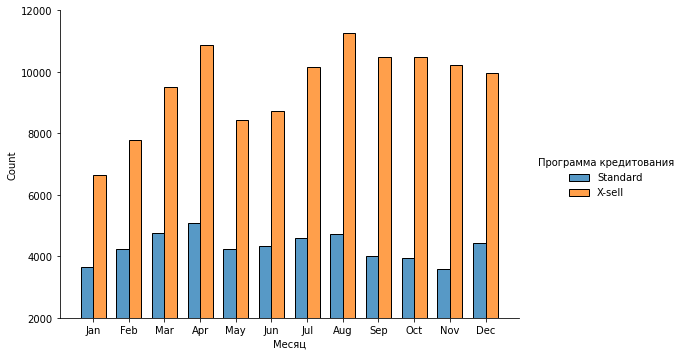

In [17]:
a = sns.displot(data=df, x='Месяц', shrink=.7, aspect=1.5, hue='Программа кредитования', multiple='dodge')
a.set(ylim=(2000, 12000))
pass

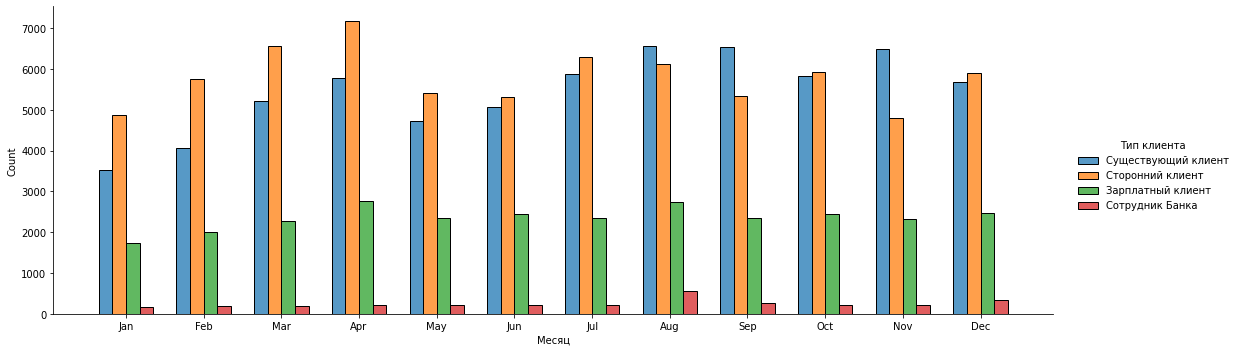

In [18]:
a = sns.displot(data=df, x='Месяц', shrink=.7, aspect=3, hue='Тип клиента', multiple='dodge')
# a.set(ylim=(0,16000))
pass

Рассмотрим показатель уровень одобрения\
уровень одобрения = количество одобренных заявок / количество всех заявок

In [19]:
df[['Флаг одобрения']] = df[['Флаг одобрения']].astype(int)

In [20]:
print('Уровень одобрения:', round(df[df['Флаг одобрения'] == 1].shape[0] / df.shape[0], 2))

Уровень одобрения: 0.37


In [21]:
approved = df[df['Флаг одобрения'] == 1].groupby('Месяц', sort=False).count()[['Идентификатор заявления']]

In [22]:
all = df.groupby(['Месяц'], sort=False).count()[['Идентификатор заявления']]

In [23]:
approve_rate  = round(approved / all, 2)
approve_rate.rename(columns={'Идентификатор заявления' : 'Уровень одобрения'}, inplace=True)

In [24]:
approve_rate['Уровень одобрения']

Месяц
Jan    0.40
Feb    0.40
Mar    0.41
Apr    0.41
May    0.43
Jun    0.38
Jul    0.33
Aug    0.39
Sep    0.33
Oct    0.33
Nov    0.33
Dec    0.33
Name: Уровень одобрения, dtype: float64

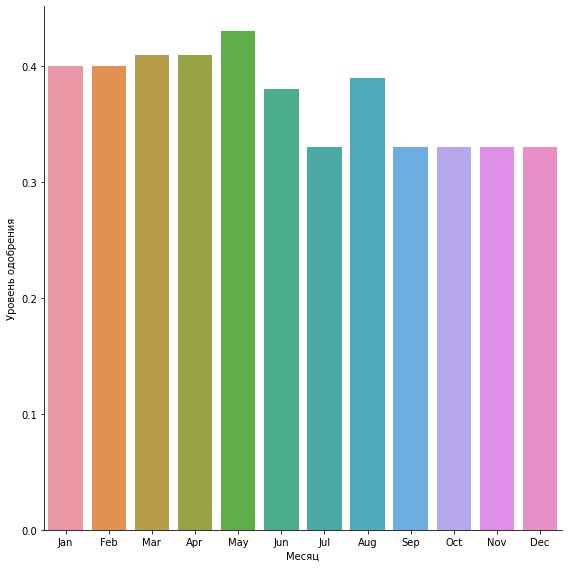

In [63]:
sns.catplot(data=approve_rate.reset_index(), x='Месяц', y='Уровень одобрения', kind='bar', height=8)
pass

In [26]:
H1_mean_ar = round(approve_rate[:6].mean(), 2)
H2_mean_ar = round(approve_rate[6:].mean(), 2)

print('На', int(round(1 - H2_mean_ar[0] / H1_mean_ar[0], 2)*100), '% упал средний уровень одобрения за второе полугодие относительно первого')

На 15 % упал средний уровень одобрения за второе полугодие относительно первого


In [54]:
table = df[df['Флаг одобрения'] == 1].groupby(['Программа кредитования', 'Тип клиента']).count()[['Идентификатор заявления']].reset_index()
table

,Программа кредитования,Тип клиента,Идентификатор заявления
0,Standard,Зарплатный клиент,4811
1,Standard,Сотрудник Банка,2262
2,Standard,Сторонний клиент,914
3,Standard,Существующий клиент,666
4,X-sell,Зарплатный клиент,7437
5,X-sell,Сторонний клиент,12809
6,X-sell,Существующий клиент,32825


In [55]:
all = df.groupby(['Программа кредитования', 'Тип клиента']).count()[['Идентификатор заявления']]

In [56]:
all.reset_index(inplace=True)

In [57]:
table['Уровень одобрения'] = round(table['Идентификатор заявления'] / all['Идентификатор заявления'], 2)
table.drop(columns=['Идентификатор заявления'], inplace=True)

In [58]:
table

,Программа кредитования,Тип клиента,Уровень одобрения
0,Standard,Зарплатный клиент,0.40
1,Standard,Сотрудник Банка,0.75
2,Standard,Сторонний клиент,0.03
3,Standard,Существующий клиент,0.13
4,X-sell,Зарплатный клиент,0.46
5,X-sell,Сторонний клиент,0.34
6,X-sell,Существующий клиент,0.54


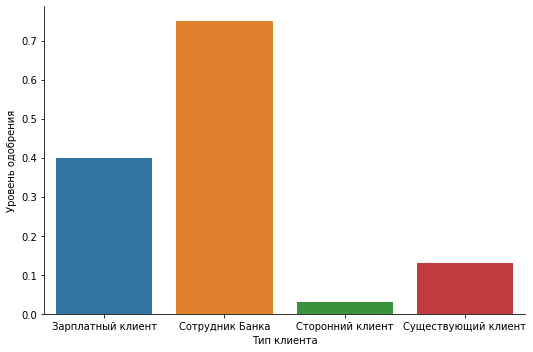

In [32]:
sns.catplot(data=table[table['Программа кредитования'] == 'Standard'], x='Тип клиента', y='Уровень одобрения', kind='bar', aspect=1.5)
pass

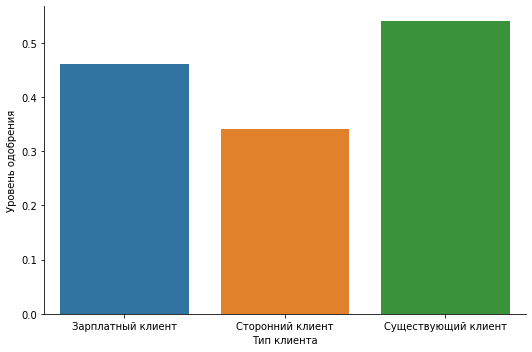

In [33]:
sns.catplot(data=table[table['Программа кредитования'] == 'X-sell'], x='Тип клиента', y='Уровень одобрения', kind='bar', aspect=1.5)
pass

In [74]:
a = df[df['Флаг одобрения'] == 1].groupby(['Месяц', 'Тип клиента', 'Программа кредитования']).count()[['Флаг одобрения']].reset_index()

In [77]:
a['Флаг одобрения'] = a['Флаг одобрения'] / df

,Месяц,Тип клиента,Программа кредитования,Флаг одобрения
0,Apr,Зарплатный клиент,Standard,475
1,Apr,Зарплатный клиент,X-sell,751
2,Apr,Сотрудник Банка,Standard,162
3,Apr,Сторонний клиент,Standard,164
4,Apr,Сторонний клиент,X-sell,1568
...,...,...,...,...
79,Sep,Сотрудник Банка,Standard,195
80,Sep,Сторонний клиент,Standard,9
81,Sep,Сторонний клиент,X-sell,878
82,Sep,Существующий клиент,Standard,42
